# Clusterização - Classificação Não Supervisionada

In [1]:
import pandas as pd, numpy as np
import sklearn.cluster, sklearn.preprocessing
import matplotlib, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
# Lendo o dataset mosn - Most Online Social Network
df = pd.read_csv('mosn.csv', thousands=',',
                   names=('Name', 'Description', 'Date', 'Registered Users',
                          'Registration', 'Alexa Rank'))
columns = ['Registered Users', 'Alexa Rank']
df.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914"
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447"
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620"
4,aNobii,Books,2006,nan,Open,"26,939"


In [3]:
len(df)

209

In [4]:
df.tail()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
204,Yammer,Social networking for office colleagues,2008,nan,Must have company email,"3,622"
205,"Yelp, Inc.",Local business review and talk,NaN,nan,Open,186
206,Yookos,"General: photos, videos, blogs, games.",NaN,nan,Open,"53,498"
207,Zoo.gr,Greek web meeting point,2004,"890,000",Open,"34,577"
208,Zooppa,Online community for creative talent (host of ...,NaN,"60,000",Open to people 14 and older,"36,373"


# Análise Descritiva

count             138
mean       53,670,308
std       190,459,963
min             1,300
25%           422,500
50%         3,000,000
75%        23,142,747
max     1,600,000,000
Name: Registered Users, dtype: float64


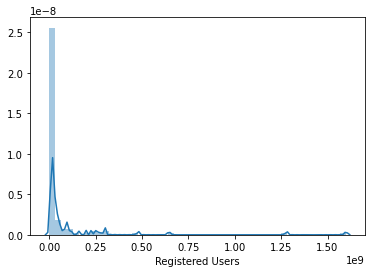

In [5]:
import seaborn as sns
import numpy as np
df2 = df.copy()
df2 = df2.dropna(subset=['Registered Users'])
sns.distplot(df2['Registered Users'])
print(df2['Registered Users'].describe())

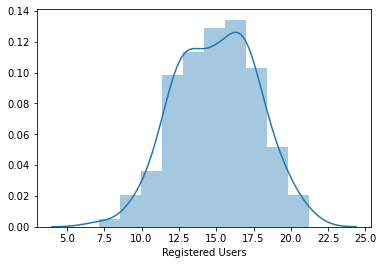

In [6]:
sns.distplot(np.log(df2['Registered Users']))

count         135
mean       80,198
std       190,750
min             2
25%         1,330
50%         8,011
75%        42,676
max     1,115,305
Name: Alexa Rank, dtype: float64


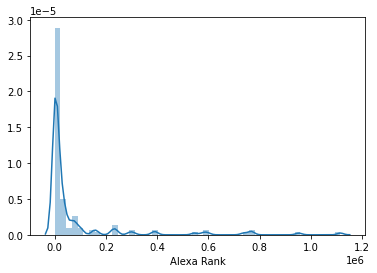

In [7]:
df2 = df2.dropna(subset=['Alexa Rank'])
sns.distplot(df2['Alexa Rank'])
print(df2['Alexa Rank'].describe())

# Algumas redes socias...

In [8]:
# procurar Redes Sociais Específicas

df[df['Registered Users'] == df['Registered Users'].max() ]

,Name,Description,Date,Registered Users,Registration,Alexa Rank
77,Google+,General,28 June 2011,"1,600,000,000",Open to people 13 and older,nan


In [9]:
df[df.Name == "Facebook"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,"1,280,000,000",Open to people 13 and older,2


In [10]:
# procurar Redes Sociais Específicas
df[df['Name'].isin(["Twitter", "Facebook", "Instagram"])]

,Name,Description,Date,Registered Users,Registration,Alexa Rank
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,"1,280,000,000",Open to people 13 and older,2
90,Instagram,A photo and video sharing site.,October 2010,"300,000,000",Open to anyone 13 or older,41
182,Twitter,"General. Micro-blogging, RSS, updates",15 July 2006,"645,750,000",Open to all ages,8


In [11]:
len(df)

209

# Pré-processamento

In [12]:
# Elimina linhas com dados "missing" (faltosos-Nulos) e zeros
df2 = df[np.log(df[columns]).notnull().all(axis=1)].copy()
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914"
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447"
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620"
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060"


In [13]:
len(df2)

135

# Clusterização

In [14]:
columns

['Registered Users', 'Alexa Rank']

In [15]:
df2.loc[:, columns].head()

,Registered Users,Alexa Rank
0,"3,000,000","12,914"
1,"18,000,000",824
2,"5,000,000","1,447"
3,"13,575","292,620"
6,"550,000","580,060"


In [16]:
# aplicar o algoritmo de clusterização
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(np.log(df2[columns]))
df2["Clusters"] = kmeans.labels_
kmeans

KMeans()

In [17]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914",4
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,7
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447",0
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620",3
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060",6


In [20]:
# acessando a tupla que contém o Facebook
fb = df2.set_index('Name').loc['Facebook']['Clusters']
df2.iloc[fb,:]

Name                              About.me
Description         Social networking site
Date                          October 2009
Registered Users                 5,000,000
Registration                          Open
Alexa Rank                           1,447
Clusters                                 0
Name: 2, dtype: object

In [21]:
df2[df2.Name == "Facebook"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,"1,280,000,000",Open to people 13 and older,2,2


In [22]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914",4
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,7
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447",0
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620",3
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060",6


In [23]:
df2.Clusters.value_counts()

1    27
5    25
7    23
0    16
4    15
3    13
6     8
2     8
Name: Clusters, dtype: int64

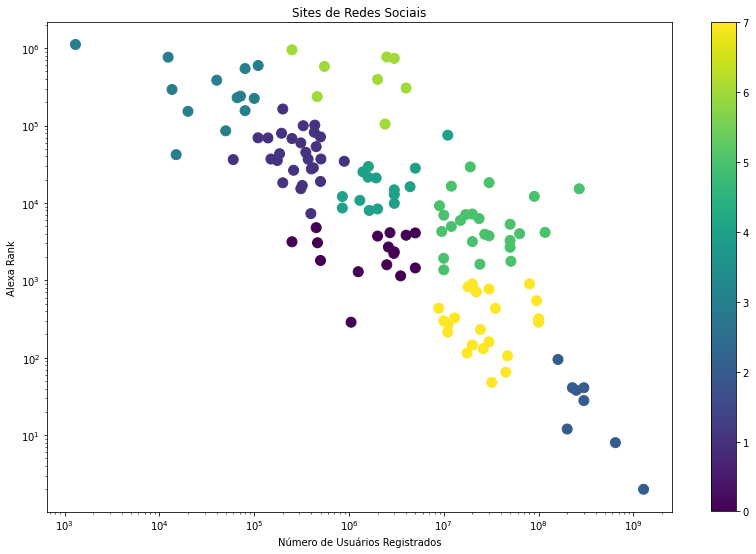

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
colors=['#12efff','#eee111','#eee00f','#e00fff','#123456','#abc222','#000000','#123fff','#1eff1f','#2edf4f','#2eaf9f',
        '#22222f',
        '#eeeff1','#eee112','#00ef00','#aa0000','#0000aa','#000999','#32efff','#23ef68','#2e3f56','#7eef1f','#eeef11']

C=1

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]    # Labels of cluster 0 to 3

dim_plot = (14,9)
fig = plt.figure(figsize=dim_plot)
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=100)

ax.set_xlabel('Número de Usuários Registrados')
ax.set_ylabel('Alexa Rank')
plt.colorbar(scatter)
plt.title("Sites de Redes Sociais")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')
#plt.figure(figsize=(18,12))
#plt.subplots(figsize=(12, 10))

#fig.show()
plt.show()

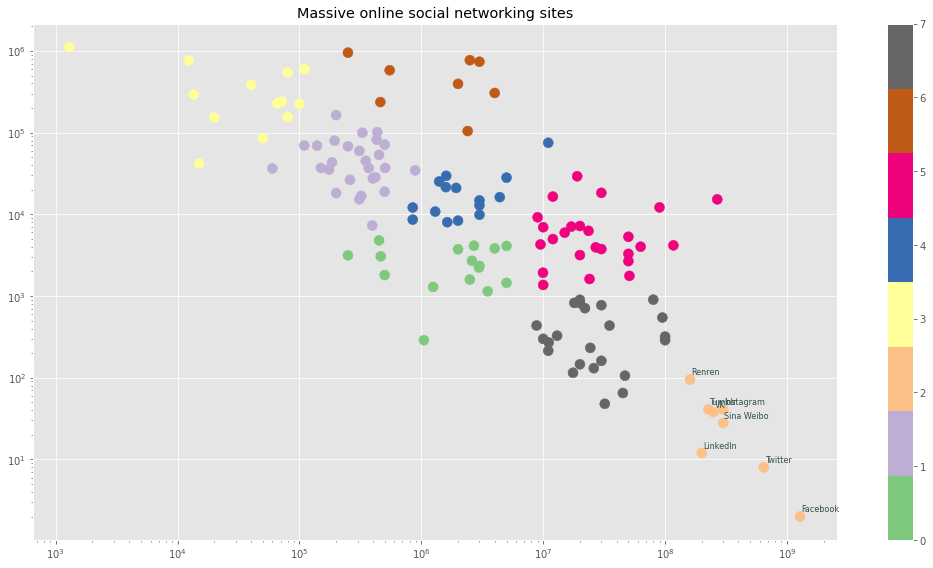

In [25]:
# Select a good-locking style
matplotlib.style.use("ggplot")

dim_plot = (18,9.5)
fig = plt.figure(figsize=dim_plot)
ax = fig.add_subplot(111)

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]
# Display the results
scatter = ax.scatter(x,y,c=Cluster,  cmap=plt.cm.Accent,s=100)

#scatter = df2.plot.scatter(columns[0], columns[1], c="Clusters", 
#                       cmap=plt.cm.Accent, s=100)

plt.colorbar(scatter)
plt.title("Massive online social networking sites")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')


# Annotate the most prominent sites
def add_abbr(site):
    if site['Clusters'] == fb:
        _ = ax.annotate(site["Name"], site[columns], xytext=(1, 5), 
                        textcoords="offset points", size=8,
                        color="darkslategrey")
df2.apply(add_abbr, axis=1)
#ax.set_aspect('auto')
#ax.set_aspect(.5)
plt.show()

In [26]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914",4
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,7
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447",0
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620",3
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060",6


In [27]:
# Cluster do Facebook
df2[df2.Name == "Facebook"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,"1,280,000,000",Open to people 13 and older,2,2


In [28]:
# Cluster do Twitter
df2[df2.Name == "Twitter"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
182,Twitter,"General. Micro-blogging, RSS, updates",15 July 2006,"645,750,000",Open to all ages,8,2


In [29]:
# Cluster do Academia.edu 
df2[df2.Name == "Academia.edu"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,7


In [ ]:
df2[df2.Name == "Instagram"]

# Predição de novos dados

In [ ]:
df2.head()

In [ ]:
df2.tail()

In [ ]:
import numpy as np

columns = ['Registered Users', 'Alexa Rank']
dados_x = [[1800000, 842], [5000000, 1200], [60000, 35000] ]
filmes = np.log([[1800000, 842], [5000000, 1200], [60000, 35000]])
kmeans.predict(filmes)

In [ ]:
# Select a good-locking style
matplotlib.style.use("ggplot")

dim_plot = (18,9.5)
fig = plt.figure(figsize=dim_plot)
ax = fig.add_subplot(111)

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]
# Display the results
scatter = ax.scatter(x,y,c=Cluster,  cmap=plt.cm.Accent,s=100)

#scatter = df2.plot.scatter(columns[0], columns[1], c="Clusters", 
#                       cmap=plt.cm.Accent, s=100)

plt.colorbar(scatter)
plt.title("Massive online social networking sites")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')


# Annotate the most prominent sites
def add_abbr(site):
    if site['Clusters'] == fb:
        _ = ax.annotate(site["Name"], site[columns], xytext=(1, 5), 
                        textcoords="offset points", size=8,
                        color="darkslategrey")
df2.apply(add_abbr, axis=1)
#ax.set_aspect('auto')
#ax.set_aspect(.5)

# os novos dados
dados_x = [[1800000, 842], [5000000, 1200], [60000, 35000] ]
x_new = [x[0] for x in dados_x]
y_new = [y[1] for y in dados_x]
plt.scatter(x_new,y_new, c='red', marker='x', s=100)

plt.show()

#  Determinando o melhor número de Clusters (Elbow Method)

In [30]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

Xy = df2.loc[:, ['Registered Users', 'Alexa Rank']]

Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(Xy).score(Xy) for i in range(len(km))]
formatted_score = map(lambda x : '{:,.0f}'.format(x), score)
print(list(formatted_score))

['-2,367,150,933,656,047,104', '-635,896,091,657,380,864', '-225,315,240,511,212,288', '-83,721,721,662,697,392', '-32,748,926,094,538,392', '-18,033,409,285,934,744', '-10,673,231,163,854,690', '-6,912,139,416,913,356', '-4,411,692,831,285,032']


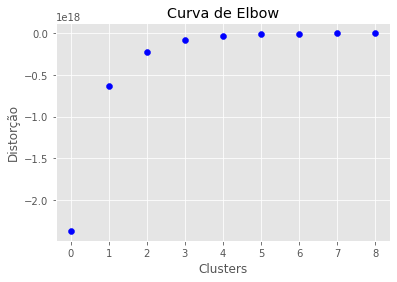

In [31]:
plt.scatter( list(range(len(score))), score, c="b")
plt.title("Curva de Elbow")
plt.xlabel("Clusters")
plt.ylabel("Distorção")
plt.show()